**FAHRI** **PUTRA** **HERLAMBANG** - **5200411389**

Pada tugas kali ini diberikan perintah untuk mereplikasi dan memperbaiki akurasi dari Model MLP yang sudah ada, dengan menggunakan dataset Bank Markering dataset.

# **1. IMPORT LIBRARY**

Pertama kita melakukan import yang diperlukan dalam melakukan membaca data, mendeskripsikan data, membuat model, dan melakukan test model

In [76]:
# library umum
import numpy as np 
import pandas as pd

# library sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from scipy.stats.mstats import winsorize

# library menampilkan data
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# **2. DATA UNDERSTANDING**

## **2.1. IMPORT DATA**

Melakukan import dang diperlukan untuk membuat model, data ini di dapat dari website https://archive.ics.uci.edu/ml/datasets/bank+marketing# 

melakukan koneksi antara google drive dengan file collab

In [77]:
# # mounting google drive to Colab Runtime environment. Koneksi Ke G.Drive
# from google.colab import drive
# drive.mount("/content/gdrive")

membuka dataset yang telah dihubungkan dengan googgle drive atau path penyimpanan dataset tersebut

In [78]:
# loading dataset
# in this dataset, the dataset_bank are separated using ';' symbol. Therefore, when reading the CSV, 
# we should instruct the Pandas DataFrame about the separater. This is because the default separater is the ',' 
# and that if we do not specify, the DataFrame will have all the row dataset_bank into one cell.

# COLLAB
# dataset_bank = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/bank-full.csv',sep=';')

# VSC
dataset_bank = pd.read_csv('D:/CODING/SMT5/NNDL/DATASET/bank/bank-full.csv',sep=';')

# getting a glimpse of the dataset_bank
dataset_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## **2.2. DESKRIPSI DATA**

Melihat dan mengetahui bagaimana bentuk dan kriteria dataset tersebut

In [79]:
# loading dataset
dataset_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


melihat isi setiap kolom yang ada pada dataset tersebut

In [80]:
# we use value_counts() to display how many instances are present in the
# categorical feature/class variable
# Value counts for categorical columns 
for i in dataset_bank.columns[dataset_bank.dtypes=='object']:
    print(dataset_bank[i].value_counts(),'\n')

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

no     44396
yes      815
Name: default, dtype: int64 

yes    25130
no     20081
Name: housing, dtype: int64 

no     37967
yes     7244
Name: loan, dtype: int64 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64 

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome

melihat data kolom target atau 'y' lalu menampilkan dalam bentuk histogram

no     39922
yes     5289
Name: y, dtype: int64

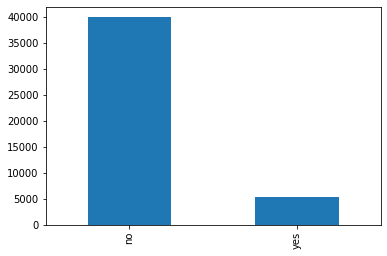

In [81]:
dataset_bank['y'].value_counts().plot(kind='bar')
dataset_bank['y'].value_counts()

Melihat deskripsi data 

In [82]:
#deskripsi data
dataset_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Melihat Info data

In [83]:
#melihat info data
dataset_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [84]:
print(dataset_bank.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [85]:
#deskripsi data
dataset_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## **2.3. PLOTTING DATA**

Melakukan Plotting Untuk Melihat Bentuk data, jumlah data, dan sebaran data

### **2.3.1. PLOTTING PENYEBARAN DATA**

In [86]:
# #plotting penyebaran data
# from pandas.plotting import scatter_matrix
# scatter_matrix(dataset_bank, alpha=0.5, figsize=(15, 15))
# plt.show()

### **2.3.2. PLOTTING JUMLAH DATA**

In [87]:
# #plotting jumlah data
# dataset_bank.hist(alpha=0.5, figsize=(15, 15), color='red')
# plt.show()

### **2.3.3. MELIHAT SEBARAN DATASET**

In [88]:
# #MELIHAT SEBARAN DATASET
# sns.pairplot(data=dataset_bank,diag_kind='hist')
# plt.show()

## **2.4. PREPROCESSING**

### **2.4.1. CHECK DUPLICATED**

Untuk mengecheck duplikasi data dan menghapusnya

In [89]:
# Check for duplicate rows.
print(f"There are {dataset_bank.duplicated().sum()} duplicate rows in the dataset_bank set.")

# Remove duplicate rows.
dataset_bank=dataset_bank.drop_duplicates()
print("The duplicate rows were removed.")

There are 0 duplicate rows in the dataset_bank set.
The duplicate rows were removed.


### **2.4.2. DROP DURATION**

duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Sesuai pada dokumentasinya, menjelaskan bahwa data duration memiliki korelasi yang tinggi dengan target variabel y. Oleh karena itu, data duration dihapus dari dataset.

In [90]:
# Remove "duration" column as proposed above in the description.
dataset_bank=dataset_bank.drop(['duration'], axis=1)

### **2.4.3. HANDLE OUTLIERS**

Dalam dataset tersebut terdapat 6 kolom numeric maka akan dilakukan handle outliers terhadap dataset tersebut, kolom numeric tersebut antara lain, age, balance, day, duration, campaign, pdays, previous.

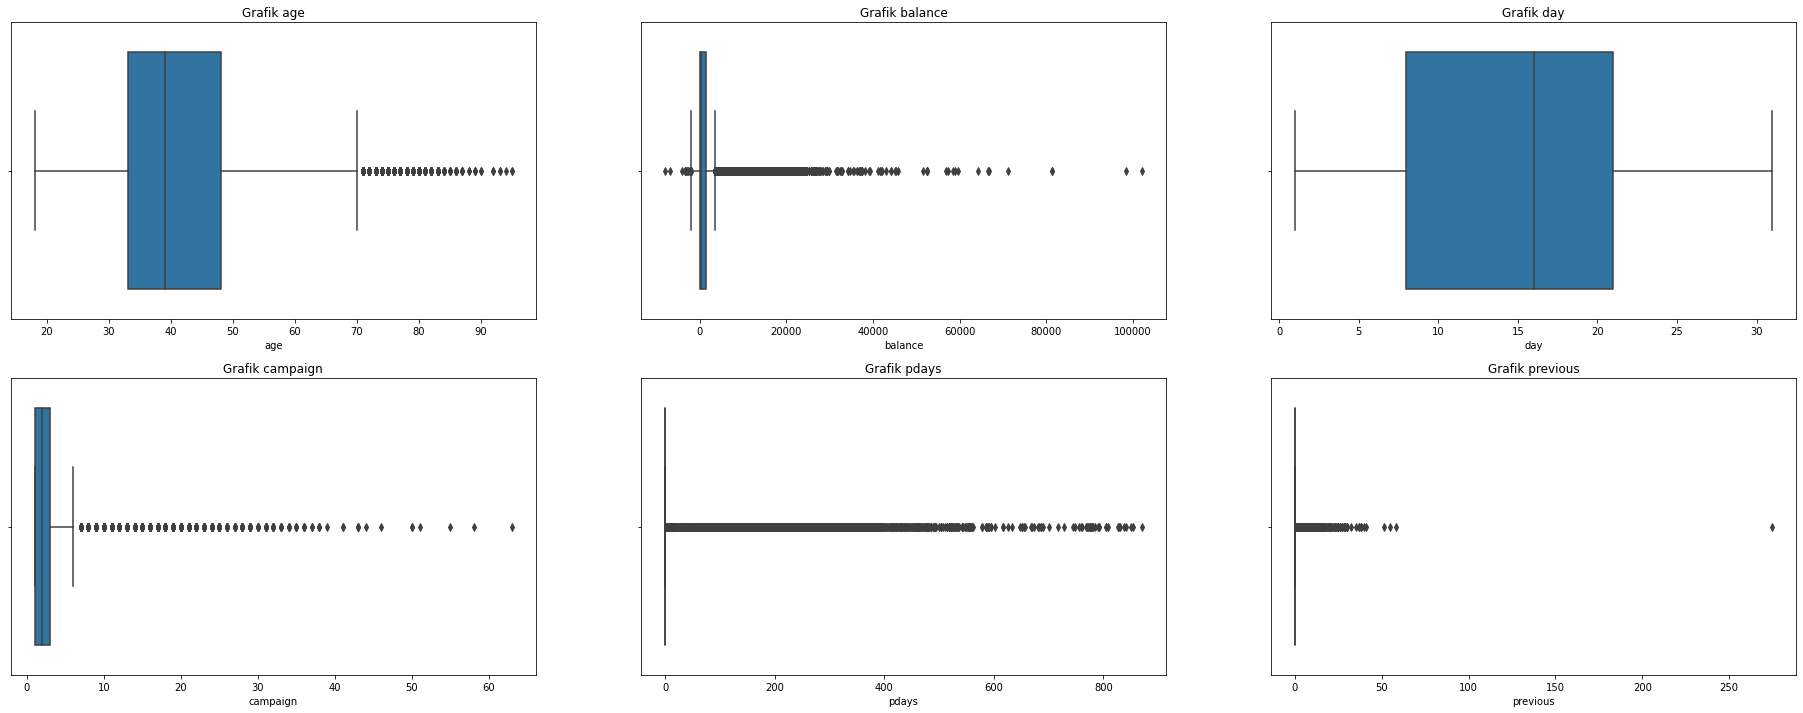

In [91]:
# code here
fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True,figsize=(32,12))

sns.boxplot(x='age',data=dataset_bank, ax=ax[0,0])
ax[0,0].set_title('Grafik age')

sns.boxplot(x='balance',data=dataset_bank, ax=ax[0,1])
ax[0,1].set_title('Grafik balance')

sns.boxplot(x='day',data=dataset_bank, ax=ax[0,2])
ax[0,2].set_title('Grafik day')

sns.boxplot(x='campaign',data=dataset_bank, ax=ax[1,0])
ax[1,0].set_title('Grafik campaign')

sns.boxplot(x='pdays',data=dataset_bank, ax=ax[1,1])
ax[1,1].set_title('Grafik pdays')

sns.boxplot(x='previous',data=dataset_bank, ax=ax[1,2])
ax[1,2].set_title('Grafik previous')

plt.show()

berdasarkan hasil boxplot tersebut terlihat merupakan outliers yang tedapat dalam data numeric yang ada, maka kita akan mengolahnya sehingga mengurangi nilai outliers yang ada, dalam source code ini saya menggunakan IQR dan membual lower bound atau batas bawah dan upper bound untuk mengeliminasi nilai outliers yang ada, kecuali pada data campaign, pdays, dan previous dikarenakan outliers yang ada sangat jauh sehingga hasil Q1,dan Q3 tidak dapat mengeliminasi nilai outliers yang ada

In [92]:
#Code here
num_cols = ['age','balance','day','campaign','pdays','previous']
for col in num_cols:
    # Mencari Quartile
    print('Kolom :',col)
    Q1 = dataset_bank[col].quantile(0.25)
    print('Q1 :',Q1)
    Q3 = dataset_bank[col].quantile(0.75)
    print('Q3 :',Q3,'\n')
    IQR = Q3 - Q1
    # Mencari Batas
    LB = Q1 - (IQR*1.5)
    UB = Q3 + (IQR*1.5)
    # Menghapus Outlier
    if col == 'campaign':
        dataset_bank = dataset_bank[(dataset_bank[col] < 38)]
    elif col == 'pdays':
        dataset_bank = dataset_bank[(dataset_bank[col] < 580)]
    elif col == 'previous':
        dataset_bank = dataset_bank[(dataset_bank[col] < 48)]
    else:
        dataset_bank = dataset_bank[(dataset_bank[col] > LB) & (dataset_bank[col] < UB)]
    



Kolom : age
Q1 : 33.0
Q3 : 48.0 

Kolom : balance
Q1 : 71.0
Q3 : 1408.0 

Kolom : day
Q1 : 8.0
Q3 : 21.0 

Kolom : campaign
Q1 : 1.0
Q3 : 3.0 

Kolom : pdays
Q1 : -1.0
Q3 : -1.0 

Kolom : previous
Q1 : 0.0
Q3 : 0.0 



In [93]:
dataset_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown,no


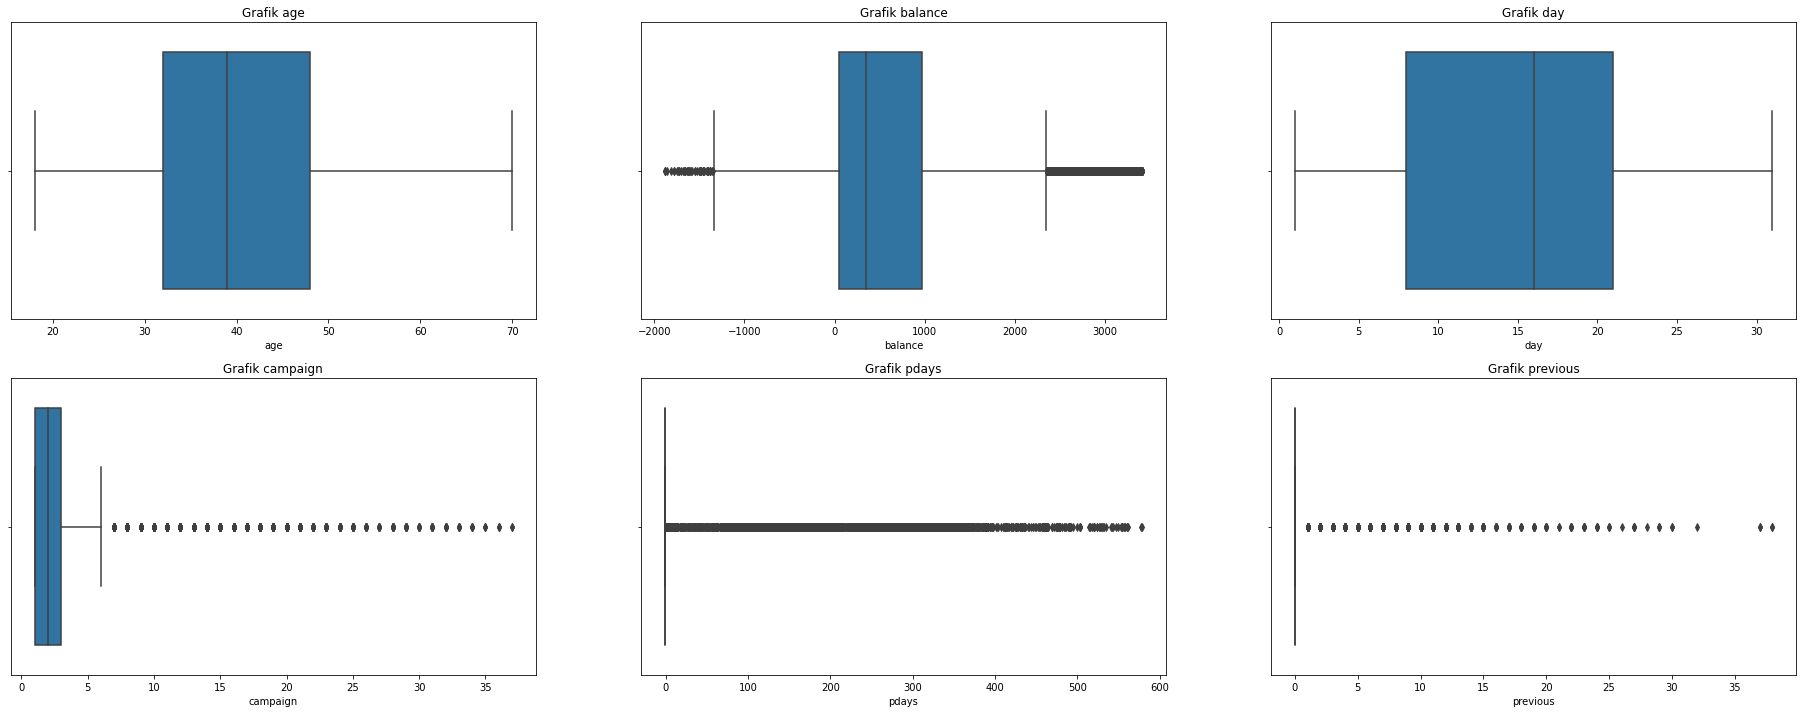

In [94]:
# code here
fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True,figsize=(32,12))

sns.boxplot(x='age',data=dataset_bank, ax=ax[0,0])
ax[0,0].set_title('Grafik age')

sns.boxplot(x='balance',data=dataset_bank, ax=ax[0,1])
ax[0,1].set_title('Grafik balance')

sns.boxplot(x='day',data=dataset_bank, ax=ax[0,2])
ax[0,2].set_title('Grafik day')

sns.boxplot(x='campaign',data=dataset_bank, ax=ax[1,0])
ax[1,0].set_title('Grafik campaign')

sns.boxplot(x='pdays',data=dataset_bank, ax=ax[1,1])
ax[1,1].set_title('Grafik pdays')

sns.boxplot(x='previous',data=dataset_bank, ax=ax[1,2])
ax[1,2].set_title('Grafik previous')

plt.show()

dari gambar boxplot diatas melihatkan bahwa outliers yang ada telah di perbaiki

### **2.4.4. ENCODING DATA**

melakukan perubahan data y atau target menjadi 0 atau 1

In [95]:
# encode strings to integer
dataset_bank['y'] = LabelEncoder().fit_transform(dataset_bank['y'])
dataset_bank['y']
dataset_bank['y'].value_counts()

0    35630
1     4323
Name: y, dtype: int64

melakukan perubahan data education berdasarkan ketentuan jika 'uknown' maka menjadi -1, jika 'primary' menjadi 1, jika 'secondary' menjadi 2, jika 'tertiary' menjadi 3

In [96]:
# checking the values in education field
dataset_bank['education'].value_counts()

education_mapper = {"unknown":-1, "primary":1, "secondary":2, "tertiary":3}
dataset_bank["education"] = dataset_bank["education"].replace(education_mapper)
dataset_bank["education"].value_counts()

 2    21037
 3    11362
 1     5965
-1     1589
Name: education, dtype: int64

mengubah data categorical menggunakan OneHotEncoding

In [97]:

# Using OneHotEncoding pandas.get_dummies

# listing down the features that has categoricaldataset_bank
categorial_features = ['job', 'marital', 'contact', 'month', 'poutcome']
# categorial_features = ['job', 'marital', 'poutcome']
for item in categorial_features:
    # assigning the encodeddataset_bank into a new DataFrame object
    df = pd.get_dummies(dataset_bank[item], prefix=item)
    dataset_bank = dataset_bank.drop(item, axis=1)
    for categorial_feature in df.columns:
        #Set the new column indataset_bank to have corresponding df values
       dataset_bank[categorial_feature] = df[categorial_feature]
       

mengubah nilai default,housing, dan loan menjadi 0 atau 1

In [98]:
binary_valued_features = ['default','housing', 'loan']
bin_dict = {'yes':1, 'no':0}

#Replace binary values in dataset_bank using the provided dictionary
for item in binary_valued_features:
    dataset_bank.replace({item:bin_dict},inplace=True)

Mengurutkan kembali kolom, sehingga y atau target berada di paling belakang

In [99]:

# rearrange the columns in the dataset to contain the y (target/label) at the end

cols = list(dataset_bank.columns.values)
cols.pop(cols.index('y')) # pop y out of the list
dataset_bank = dataset_bank[cols+['y']] #Create new dataframe with columns in new 

In [100]:
#deskripsi data
dataset_bank.describe()

,age,education,default,balance,housing,loan,day,campaign,pdays,previous,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
count,39953.000000,39953.000000,39953.000000,39953.000000,39953.000000,39953.000000,39953.000000,39953.000000,39953.000000,39953.000000,...,39953.000000,39953.000000,39953.000000,39953.000000,39953.000000,39953.000000,39953.000000,39953.000000,39953.000000,39953.000000
mean,40.280480,2.015769,0.020049,630.590118,0.569820,0.170826,15.769204,2.764724,39.179461,0.546968,...,0.009086,0.317748,0.075964,0.013566,0.010788,0.106025,0.039897,0.030536,0.823543,0.108202
std,9.892933,0.889607,0.140168,833.162121,0.495107,0.376361,8.366928,3.007060,97.955507,1.792598,...,0.094886,0.465607,0.264944,0.115682,0.103303,0.307873,0.195719,0.172059,0.381214,0.310639
min,18.000000,-1.000000,0.000000,-1884.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,2.000000,0.000000,44.000000,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,2.000000,0.000000,343.000000,1.000000,0.000000,16.000000,2.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,3.000000,0.000000,967.000000,1.000000,0.000000,21.000000,3.000000,-1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,70.000000,3.000000,1.000000,3413.000000,1.000000,1.000000,31.000000,37.000000,579.000000,38.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **3. IMPLEMENTASI MLP**

## **3.1. PEMBAGIAN DATA **

membagi dat untuk dibuat ke dalam X_train, X_test, y_train, y_test

In [101]:

y = dataset_bank['y']
X = dataset_bank.values[:, :-1] # get all columns except the last column

# spliting training and testing dataset_bank

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [102]:
# Feature scaling
scaler = StandardScaler()  
scaler.fit(X)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [103]:

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1.000000,-0.152885,-0.013026,0.083076,-0.153565,0.004165,-0.006706,0.014521,-0.028236,-0.005834,...,0.065989,-0.005127,-0.109239,0.030520,0.023329,-0.005843,-0.002637,-0.033787,0.009033,0.015190
1,-0.152885,1.000000,-0.009655,0.027886,-0.033004,0.013775,0.021356,0.001692,-0.000528,0.023272,...,-0.064036,0.021934,-0.079301,0.052532,0.015712,0.008644,0.006535,0.013033,0.037892,-0.029080
2,-0.013026,-0.009655,1.000000,-0.129858,-0.008517,0.077372,0.009420,0.017187,-0.028768,-0.021657,...,0.013783,-0.013624,-0.005140,0.007415,-0.016310,-0.014453,-0.025113,-0.014705,-0.022749,0.038107
3,0.083076,0.027886,-0.129858,1.000000,-0.060292,-0.096006,-0.000557,-0.031599,0.020065,0.037706,...,0.057456,0.036127,-0.080508,0.090040,0.033143,0.037436,0.028906,0.015241,0.061127,-0.058843
4,-0.153565,-0.033004,-0.008517,-0.060292,1.000000,0.026046,-0.037896,-0.035793,0.138928,0.050384,...,-0.101739,-0.057460,0.432187,-0.007400,-0.071143,-0.064691,0.109709,0.048588,-0.083782,-0.075515
5,0.004165,0.013775,0.077372,-0.096006,0.026046,1.000000,0.011738,0.011480,-0.020394,-0.010344,...,-0.017782,-0.025826,-0.041222,0.023598,-0.023965,-0.031109,-0.000099,-0.005899,-0.051293,0.026322
6,-0.006706,0.021356,0.009420,-0.000557,-0.037896,0.011738,1.000000,0.172021,-0.099876,-0.061799,...,-0.189275,-0.021266,-0.031673,0.086019,0.026261,-0.056730,-0.073400,-0.038280,-0.030197,0.092543
7,0.014521,0.001692,0.017187,-0.031599,-0.035793,0.011480,0.172021,1.000000,-0.086856,-0.036035,...,0.039298,-0.018962,-0.078410,-0.079426,-0.048407,-0.031682,-0.088221,-0.016465,-0.057831,0.105995
8,-0.028236,-0.000528,-0.028768,0.020065,0.138928,-0.020394,-0.099876,-0.086856,1.000000,0.556528,...,-0.113987,0.029417,0.096303,0.010619,0.038207,0.057972,0.721622,0.390452,0.227755,-0.885658
9,-0.005834,0.023272,-0.021657,0.037706,0.050384,-0.010344,-0.061799,-0.036035,0.556528,1.000000,...,-0.074507,0.028399,0.010518,0.059190,0.057377,0.062771,0.439777,0.361241,0.246879,-0.651306


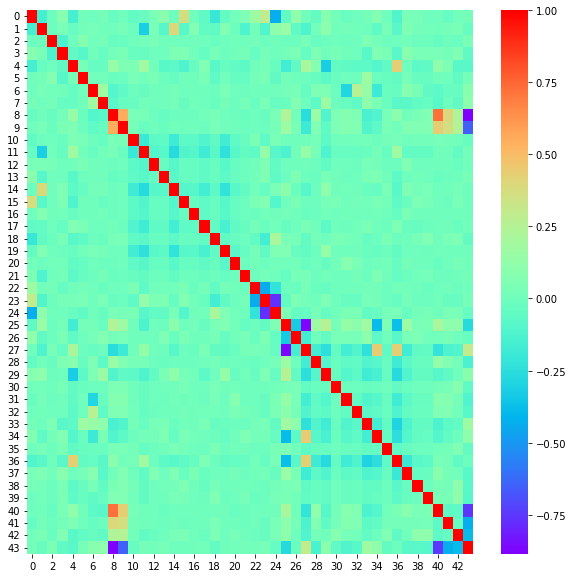

In [104]:
# draw the correlation matrix
correlation_matrix = pd.DataFrame(X_train).corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(correlation_matrix,cmap='rainbow', ax=ax)
correlation_matrix

menghapus nilai yang lebih besar dari 0.95 yang ada dalam correlation matrix

In [105]:
# getting the upper triangle of the correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

# checking which columns can be dropped
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print('\nTo drop')
print(to_drop)

# removing the selected columns
X_train = X_train.drop(X_train.columns[to_drop], axis=1)
X_test = X_test.drop(X_test.columns[to_drop], axis=1)
print(X_train.head())
     

    0         1         2         3         4         5         6         7   \
0  NaN -0.152885 -0.013026  0.083076 -0.153565  0.004165 -0.006706  0.014521   
1  NaN       NaN -0.009655  0.027886 -0.033004  0.013775  0.021356  0.001692   
2  NaN       NaN       NaN -0.129858 -0.008517  0.077372  0.009420  0.017187   
3  NaN       NaN       NaN       NaN -0.060292 -0.096006 -0.000557 -0.031599   
4  NaN       NaN       NaN       NaN       NaN  0.026046 -0.037896 -0.035793   
5  NaN       NaN       NaN       NaN       NaN       NaN  0.011738  0.011480   
6  NaN       NaN       NaN       NaN       NaN       NaN       NaN  0.172021   
7  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10 NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11 NaN       NaN       NaN       NaN    

dikarenakan data 0 dan data 1  jumlahnya berbeda cukup banyak makan saya melakukan oversampling menggunakan smote

In [106]:
# from collections import Counter

# from imblearn.over_sampling import SMOTE

# counter = Counter(y_train)
# print('Before',counter)
# # oversampling the train dataset using SMOTE
# smt = SMOTE()
# #X_train, y_train = smt.fit_resample(X_train, y_train)
# X_train, y_train = smt.fit_resample(X_train, y_train)

# counter = Counter(y_train)
# print('After',counter)

menggunakan pca untuk mengatur feature reduction

In [107]:

# apply the PCA for feature for feature reduction
pca = PCA(n_components=0.95)
pca.fit(X_train)
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)

X_train
     

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1.993319,1.106380,-0.143034,2.183768,-1.150915,-0.453893,-0.809053,0.743352,-0.410186,-0.305129,...,-0.362044,-0.095755,-0.682448,-0.286722,-0.117271,-0.104429,-0.344382,-0.20385,-0.177476,0.462889
1,-0.533769,-0.017725,-0.143034,-0.043918,0.868874,-0.453893,-1.167612,-0.254313,-0.410186,-0.305129,...,2.762093,-0.095755,-0.682448,-0.286722,-0.117271,-0.104429,-0.344382,-0.20385,-0.177476,0.462889
2,0.274899,-0.017725,-0.143034,1.556031,0.868874,-0.453893,0.386144,-0.586867,-0.410186,-0.305129,...,-0.362044,-0.095755,-0.682448,3.487705,-0.117271,-0.104429,-0.344382,-0.20385,-0.177476,0.462889
3,-0.533769,1.106380,-0.143034,-0.503618,-1.150915,-0.453893,-1.406651,-0.586867,-0.410186,-0.305129,...,-0.362044,-0.095755,-0.682448,-0.286722,-0.117271,-0.104429,-0.344382,-0.20385,-0.177476,0.462889
4,0.881400,-0.017725,-0.143034,0.304158,0.868874,-0.453893,-0.928573,0.078242,-0.410186,-0.305129,...,-0.362044,-0.095755,-0.682448,-0.286722,-0.117271,-0.104429,-0.344382,-0.20385,-0.177476,0.462889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,-0.129435,-1.141831,-0.143034,1.120336,-1.150915,-0.453893,0.147104,-0.586867,-0.410186,-0.305129,...,2.762093,-0.095755,-0.682448,-0.286722,-0.117271,-0.104429,-0.344382,-0.20385,-0.177476,0.462889
31958,1.386817,-1.141831,-0.143034,-0.474812,-1.150915,2.203161,0.625183,-0.254313,0.753622,2.484153,...,-0.362044,-0.095755,-0.682448,3.487705,-0.117271,-0.104429,2.903752,-0.20385,-0.177476,-2.160345
31959,-0.533769,1.106380,-0.143034,-0.132737,0.868874,-0.453893,-1.406651,0.078242,-0.226427,2.484153,...,-0.362044,-0.095755,1.465314,-0.286722,-0.117271,-0.104429,2.903752,-0.20385,-0.177476,-2.160345
31960,0.072732,-0.017725,-0.143034,-0.756873,0.868874,-0.453893,1.461821,-0.254313,-0.410186,-0.305129,...,-0.362044,-0.095755,-0.682448,-0.286722,-0.117271,-0.104429,-0.344382,-0.20385,-0.177476,0.462889


melihat data yang dihasilkan untuk siap di buat model MLP

In [108]:
# Determine the number of principal components
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Determine the number of features
n_features = X_train.shape[1]
print('Number of features:', n_features)

(31962, 44) (7991, 44) (31962,) (7991,)
Number of features: 44


In [109]:
# record stats
print(f"JUMLAH DATA TRAINING = {X_train.shape[0]} \nJUMLAH DATA TESTING = {X_test.shape[0]} ")

JUMLAH DATA TRAINING = 31962 
JUMLAH DATA TESTING = 7991 


## **3.2. MEMBUAT MODEL dan TRAINING MODEL**

proses pembuatan model mlp yang telah di uji untuk mendapatkan akurasi terbaik

In [110]:
# define and train an MLPClassifier named mlp on the given data
epochs = 300
mlp = MLPClassifier(hidden_layer_sizes=(128,64,32,16), max_iter=epochs, activation='logistic', solver='sgd', batch_size=32, learning_rate_init=0.01, random_state=0, )
hist = mlp.fit(PCA_X_train, y_train)

# **4. PLOTTING HASIL AKURASI DAN PREDIKSI**

Accuracy
0.8887498435740208


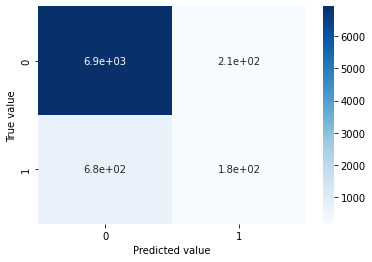

In [111]:

print('Accuracy')
print(mlp.score(PCA_X_test, y_test))

# draw the confusion matrix
predict = mlp.predict(PCA_X_test)

confusion_matrix = confusion_matrix(y_test, predict)
fig, ax = plt.subplots(1)
ax = sns.heatmap(confusion_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

In [112]:
# print the training error and MSE
print("Training error: %f" % mlp.loss_curve_[-1])
print("Training set score: %f" % mlp.score(PCA_X_train, y_train))
print("Test set score: %f"  % mlp.score(PCA_X_test, y_test))
print(accuracy_score(y_test, predict))

print("MSE: %f \t" % mean_squared_error(y_test, predict))

Training error: 0.218423
Training set score: 0.930136
Test set score: 0.888750
0.8887498435740208
MSE: 0.111250 	


# MENCARI MODEL DENGAN AKURASI TERBAIK 

Untuk mencari akurasi terbaik saya menggunakan proses perulangan yang dibuat menggunakan file .py

In [113]:
%%script echo skipping # AGAR TIDAK DIJALANKAN PADA JUPYTER NOTEBOOK

# library umum
import numpy as np 
import pandas as pd

# library sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error

# library menampilkan data
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


# VSC
dataset_bank = pd.read_csv('D:/CODING/SMT5/NNDL/DATASET/bank/bank-full.csv',sep=';')

dataset_bank=dataset_bank.drop_duplicates()
dataset_bank=dataset_bank.drop(['duration'], axis=1)
#Code here
num_cols = ['age','balance','day','campaign','pdays','previous']
for col in num_cols:
    # Mencari Quartile
    Q1 = dataset_bank[col].quantile(0.25)
    Q3 = dataset_bank[col].quantile(0.75)
    IQR = Q3 - Q1
    # Mencari Batas
    LB = Q1 - (IQR*1.5)
    UB = Q3 + (IQR*1.5)
    # Menghapus Outlier
    if col == 'campaign':
        dataset_bank = dataset_bank[(dataset_bank[col] < 38)]
    elif col == 'pdays':
        dataset_bank = dataset_bank[(dataset_bank[col] < 580)]
    elif col == 'previous':
        dataset_bank = dataset_bank[(dataset_bank[col] < 48)]
    else:
        dataset_bank = dataset_bank[(dataset_bank[col] > LB) & (dataset_bank[col] < UB)]
    
# encode strings to integer
dataset_bank['y'] = LabelEncoder().fit_transform(dataset_bank['y'])
dataset_bank['y']
dataset_bank['y'].value_counts()

education_mapper = {"unknown":-1, "primary":1, "secondary":2, "tertiary":3}
dataset_bank["education"] = dataset_bank["education"].replace(education_mapper)

# listing down the features that has categoricaldataset_bank
categorial_features = ['job', 'marital', 'contact', 'month', 'poutcome']
# categorial_features = ['job', 'marital', 'poutcome']
for item in categorial_features:
    # assigning the encodeddataset_bank into a new DataFrame object
    df = pd.get_dummies(dataset_bank[item], prefix=item)
    dataset_bank = dataset_bank.drop(item, axis=1)
    for categorial_feature in df.columns:
        #Set the new column indataset_bank to have corresponding df values
       dataset_bank[categorial_feature] = df[categorial_feature]
       
binary_valued_features = ['default','housing', 'loan']
bin_dict = {'yes':1, 'no':0}

#Replace binary values in dataset_bank using the provided dictionary
for item in binary_valued_features:
    dataset_bank.replace({item:bin_dict},inplace=True)

cols = list(dataset_bank.columns.values)
cols.pop(cols.index('y')) # pop y out of the list
dataset_bank = dataset_bank[cols+['y']] #Create new dataframe with columns in new 

y = dataset_bank['y']
X = dataset_bank.values[:, :-1] # get all columns except the last column
activation = ['identity', 'logistic', 'relu', 'tanh']
solver = ['adam', 'sgd', 'lbfgs']
hid_Layer = [(128,64,32,16,8), (128,64,32,16), (128,64,32), (128,64), 
             (128,64,32,16,8,4), (128,64,32,16,8,4,2),
             (128,64,32,16,8,4,2,1)]
learn_rate = [0.001, 0.01, 0.1]
act = []
solv = []
hd_lyr = []
lrt = []
acc = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Feature scaling
scaler = StandardScaler()  
scaler.fit(X)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)
  
correlation_matrix = pd.DataFrame(X_train).corr()
    
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
  
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))

# checking which columns can be dropped
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
X_train = X_train.drop(X_train.columns[to_drop], axis=1)
X_test = X_test.drop(X_test.columns[to_drop], axis=1)
    
# apply the PCA for feature for feature reduction
pca = PCA(n_components=0.95)
pca.fit(X_train)
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)
i=1
for actv in activation:
    for sol in solver:
        for hid in hid_Layer:
            for lr in learn_rate:
                mlp = MLPClassifier(hidden_layer_sizes=hid, max_iter=50, activation=actv, solver=sol, batch_size=32, learning_rate_init=lr, random_state=42, )
                hist = mlp.fit(PCA_X_train, y_train)
                act.append(actv)
                solv.append(sol)
                hd_lyr.append(hid)
                lrt.append(lr)
                # jd.append(j)
                acc.append(mlp.score(PCA_X_test, y_test))
                print(i)
                i+=1
        
print(f'Accuracy: {max(acc)} %')
print('index:', np.argmax(acc),
      '\nbest learning rate: ',lrt[np.argmax(acc)], 
      '\nBest hidden layer: ', hd_lyr[np.argmax(acc)],
      '\nBest MLP Activation: ', act[np.argmax(acc)],
      '\nBest MLP Solver: ', solv[np.argmax(acc)])

Couldn't find program: 'echo'


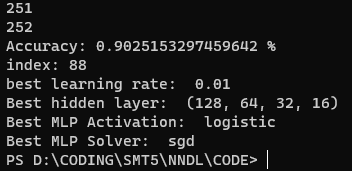

Pada gambar tersebut, file CariBest.py dijalankan pada command promp menjalankan perulangan kepada 4 model activation,3 model solver, 7 model hidden layer, dan 3 model learning rate init. 
Menghasilkan akurasi sebesar 90.25% pada index ke 88 
dengan learning rate 0.01, hidden layer (128,64,32,16), activation logistic atau biasa disebut sigmoid, dan solver menggunakan sgd.

In [114]:
%%script echo skipping # AGAR TIDAK DIJALANKAN PADA JUPYTER NOTEBOOK

# library umum
import numpy as np 
import pandas as pd

# library sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error

# library menampilkan data
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


# VSC
dataset_bank = pd.read_csv('D:/CODING/SMT5/NNDL/DATASET/bank/bank-full.csv',sep=';')

dataset_bank=dataset_bank.drop_duplicates()
dataset_bank=dataset_bank.drop(['duration'], axis=1)
#Code here
num_cols = ['age','balance','day','campaign','pdays','previous']
for col in num_cols:
    # Mencari Quartile
    Q1 = dataset_bank[col].quantile(0.20)
    Q3 = dataset_bank[col].quantile(0.80)
    IQR = Q3 - Q1
    # Mencari Batas
    LB = Q1 - (IQR*1.5)
    UB = Q3 + (IQR*1.5)
    # Menghapus Outlier
    if col == 'campaign':
        dataset_bank = dataset_bank[(dataset_bank[col] < 38)]
    elif col == 'pdays':
        dataset_bank = dataset_bank[(dataset_bank[col] < 580)]
    elif col == 'previous':
        dataset_bank = dataset_bank[(dataset_bank[col] < 48)]
    else:
        dataset_bank = dataset_bank[(dataset_bank[col] > LB) & (dataset_bank[col] < UB)]
    
# encode strings to integer
dataset_bank['y'] = LabelEncoder().fit_transform(dataset_bank['y'])
dataset_bank['y']
dataset_bank['y'].value_counts()

education_mapper = {"unknown":-1, "primary":1, "secondary":2, "tertiary":3}
dataset_bank["education"] = dataset_bank["education"].replace(education_mapper)

# listing down the features that has categoricaldataset_bank
categorial_features = ['job', 'marital', 'contact', 'month', 'poutcome']
# categorial_features = ['job', 'marital', 'poutcome']
for item in categorial_features:
    # assigning the encodeddataset_bank into a new DataFrame object
    df = pd.get_dummies(dataset_bank[item], prefix=item)
    dataset_bank = dataset_bank.drop(item, axis=1)
    for categorial_feature in df.columns:
        #Set the new column indataset_bank to have corresponding df values
       dataset_bank[categorial_feature] = df[categorial_feature]
       
binary_valued_features = ['default','housing', 'loan']
bin_dict = {'yes':1, 'no':0}

#Replace binary values in dataset_bank using the provided dictionary
for item in binary_valued_features:
    dataset_bank.replace({item:bin_dict},inplace=True)

cols = list(dataset_bank.columns.values)
cols.pop(cols.index('y')) # pop y out of the list
dataset_bank = dataset_bank[cols+['y']] #Create new dataframe with columns in new 

y = dataset_bank['y']
X = dataset_bank.values[:, :-1] # get all columns except the last column

id = []
jd = []
acc = []
idx=1
for i in range(0, 50):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    # Feature scaling
    scaler = StandardScaler()  
    scaler.fit(X)
    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test)
    
    correlation_matrix = pd.DataFrame(X_train).corr()
        
    X_train = pd.DataFrame(X_train)
    X_test = pd.DataFrame(X_test)
    
    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))

    # checking which columns can be dropped
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
    X_train = X_train.drop(X_train.columns[to_drop], axis=1)
    X_test = X_test.drop(X_test.columns[to_drop], axis=1)
        
    # apply the PCA for feature for feature reduction
    pca = PCA(n_components=0.95)
    pca.fit(X_train)
    PCA_X_train = pca.transform(X_train)
    PCA_X_test = pca.transform(X_test)
    
    for j in range(0, 50):
        mlp = MLPClassifier(hidden_layer_sizes=(128,64), max_iter=10, activation='relu', solver='adam', batch_size=32, learning_rate_init=0.01, random_state=42, )
        hist = mlp.fit(PCA_X_train, y_train)
        id.append(i)
        jd.append(j)
        acc.append(mlp.score(PCA_X_test, y_test))
        print(idx)
        idx+=1
        
print(f'Accuracy: {max(acc)} %')
print('index:', np.argmax(acc),
      '\nrandom_state train_test_split: ',id[np.argmax(acc)], 
      '\nrandom_state MLP: ',jd[np.argmax(acc)])


Couldn't find program: 'echo'


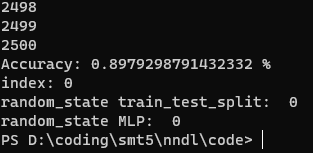